<a href="https://colab.research.google.com/github/kaayaanil/pytorch_examples/blob/main/PyTorch_Tutorial_NN_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# For regression

In [98]:
import numpy as np
import torch
from torch import nn
from torchvision.transforms import ToTensor,Lambda
from torchvision import datasets
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader,Dataset

### First i use the colifornia housing dataset
##### X-> 20640*8; it include the each house atrribute
##### y -> 20640 samples; prices each house

In [4]:
(data,target) = fetch_california_housing(return_X_y=True)

In [10]:
num_rows,num_cols = data.shape

In [11]:
target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

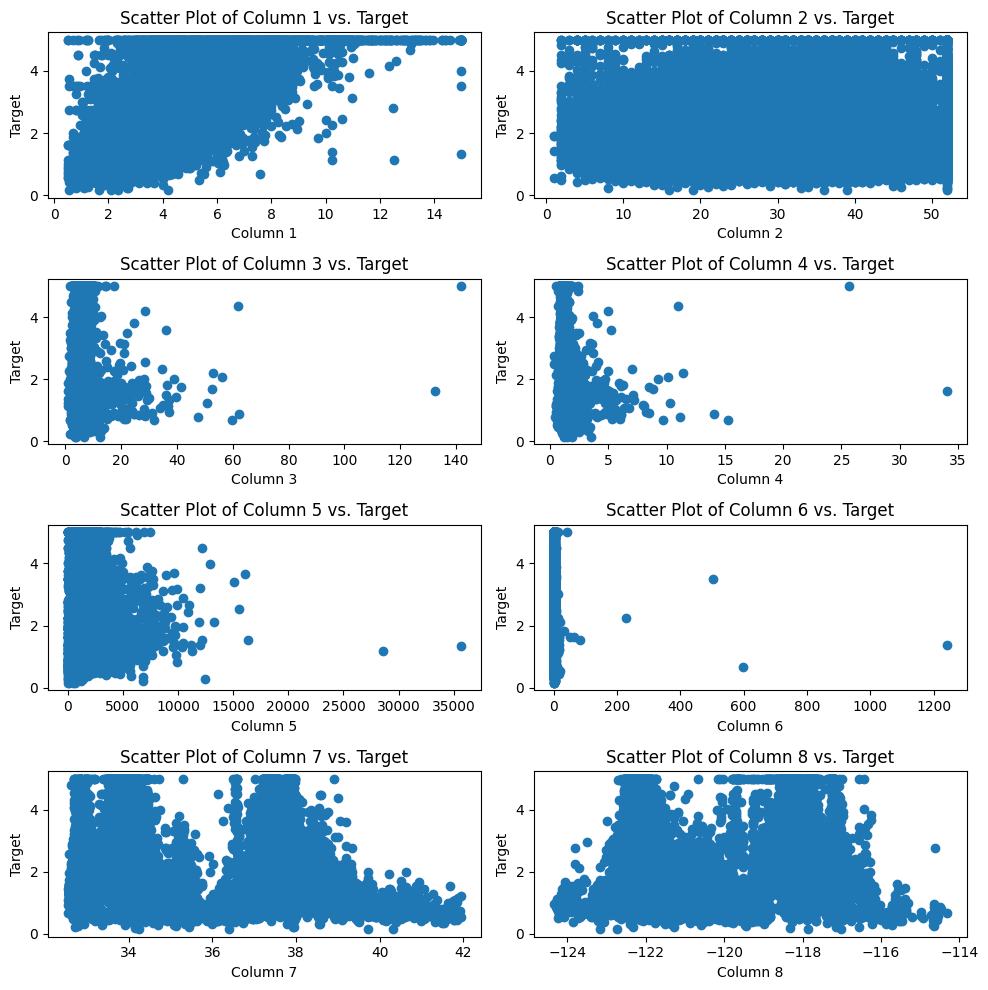

In [20]:

num_rows = 4
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))  # Adjust figsize as per your preference

for i in range(num_rows):
    for j in range(num_cols):
        column_index = i * num_cols + j
        axs[i, j].scatter(data[:, column_index], target)
        axs[i, j].set_xlabel(f'Column {column_index+1}')
        axs[i, j].set_ylabel('Target')
        axs[i, j].set_title(f'Scatter Plot of Column {column_index+1} vs. Target')

plt.tight_layout()  # To improve spacing between subplots
plt.show()

#### NN Building

In [266]:
from torch.utils.data import random_split
data_tensor = torch.tensor(data).to(torch.float32)
target_tensor = torch.tensor(target).to(torch.float32)

In [267]:
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        x = self.X[idx]
        y = self.y[idx]
        return x, y

dataset = MyDataset(data_tensor,target_tensor)

In [268]:
generator1 = torch.Generator().manual_seed(42)
train_data,test_data = random_split(dataset,lengths = [round(data_tensor.shape[0]*0.7),int(data.shape[0]*0.3)],generator=generator1)

In [269]:
train_dataloader = DataLoader(train_data,batch_size=16)
test_dataloader = DataLoader(test_data,batch_size=16)

In [270]:
class RegressionNeuralNetwork(nn.Module):
  def __init__(self):
    super(RegressionNeuralNetwork,self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(8,8),
        nn.ReLU(),
        nn.Linear(8,16),
        nn.ReLU(),
        nn.Linear(16,4),
        nn.ReLU(),
        nn.Linear(4,1)
    )
  def forward(self,x):
    x = self.flatten(x)
    outs = self.linear_relu_stack(x)
    return outs

In [291]:
def train_loop(dataloader,model,loss_fn,optimizer):
  batches = []
  scores = []
  size = len(dataloader.dataset)
  for batch,(X,y) in enumerate(dataloader):
    outs = model(X)
    loss = loss_fn(outs,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    batches.append(batch)
    scores.append(loss.item())

    if batch % 50 == 0:
      print(f"Batch {batch} score is: {loss.item()}")
      print(f"Complated [{batch*len(X)}/{size}]")

  plt.plot(np.array(scores))
  plt.title(f"Optimizer = {type(optimizer).__name__}, Batch_size = {dataloader.batch_size}")
  plt.show()

Batch 0 score is: 65.48101043701172
Batch 10 score is: 9.085103988647461
Batch 20 score is: 6.067610740661621
Batch 30 score is: 2.9496753215789795
Batch 40 score is: 3.1190226078033447
Batch 50 score is: 2.0146491527557373
Batch 60 score is: 3.860976457595825
Batch 70 score is: 1.9870072603225708
Batch 80 score is: 2.44557785987854
Batch 90 score is: 1.8958160877227783
Batch 100 score is: 1.5015814304351807
Batch 110 score is: 0.7372874021530151
Batch 120 score is: 2.4117939472198486
Batch 130 score is: 1.6812103986740112
Batch 140 score is: 1.2806832790374756
Batch 150 score is: 1.4313710927963257
Batch 160 score is: 1.164613962173462
Batch 170 score is: 0.7796528339385986
Batch 180 score is: 0.7484718561172485
Batch 190 score is: 1.4479173421859741
Batch 200 score is: 1.1528388261795044
Batch 210 score is: 2.1133644580841064
Batch 220 score is: 1.2385057210922241
Batch 230 score is: 1.6040072441101074
Batch 240 score is: 0.9665253162384033
Batch 250 score is: 1.0807452201843262
Batc

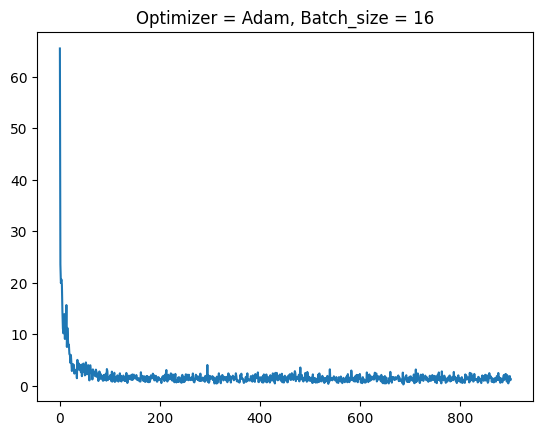

In [277]:
model = RegressionNeuralNetwork()
learning_rate = 0.001
batch_size = 1
epochs = 2

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_loop(train_dataloader,model,loss_fn,optimizer)

Batch 0 score is: 2.814188003540039
Batch 10 score is: 4.429412364959717
Batch 20 score is: 3.904998302459717
Batch 30 score is: 2.752955675125122
Batch 40 score is: 3.099064826965332
Batch 50 score is: 2.79256534576416
Batch 60 score is: 4.825039386749268
Batch 70 score is: 4.000699996948242
Batch 80 score is: 3.8174612522125244
Batch 90 score is: 3.307638168334961
Batch 100 score is: 3.2884867191314697
Batch 110 score is: 1.952617883682251
Batch 120 score is: 3.4585413932800293
Batch 130 score is: 2.9965178966522217
Batch 140 score is: 1.4604274034500122
Batch 150 score is: 0.7346821427345276
Batch 160 score is: 2.2739388942718506
Batch 170 score is: 1.7744719982147217
Batch 180 score is: 0.7900355458259583
Batch 190 score is: 2.813234806060791
Batch 200 score is: 1.5070215463638306
Batch 210 score is: 3.768089532852173
Batch 220 score is: 1.2718846797943115
Batch 230 score is: 2.4559566974639893
Batch 240 score is: 1.9410500526428223
Batch 250 score is: 1.5099655389785767
Batch 260 

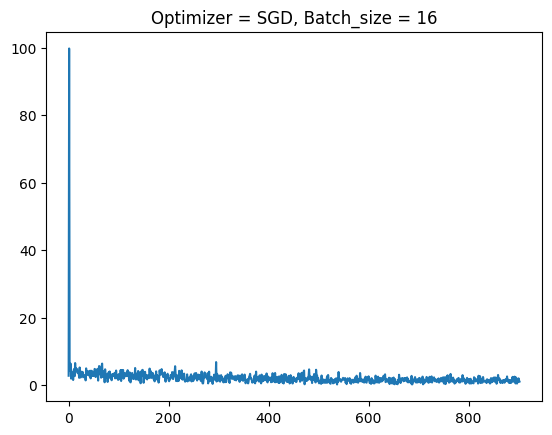

In [278]:
model2 = RegressionNeuralNetwork()
learning_rate = 0.001
batch_size = 1
epochs = 2

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loop(train_dataloader,model,loss_fn,optimizer)

In [281]:
def test_loop(dataloader,model,loss_fn,optimizer):
  size = len(dataloader.dataset)
  loss = 0
  with torch.no_grad():
    for X,y in dataloader:
      pred = model(X)
      loss += loss_fn(pred,y)

  print(f"Loss of test is : {loss/size}")


In [286]:
test_loop(test_dataloader,model2,loss_fn,optimizer)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Loss of test is : 59.43095397949219


----------------------Epoch 1----------------------
Batch 0 score is: 48.23870086669922
Complated [0/14448]
Batch 50 score is: 1.094773769378662
Complated [5000/14448]


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Batch 100 score is: 1.6193439960479736
Complated [10000/14448]


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([48])) that is different to the input size (torch.Size([48, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


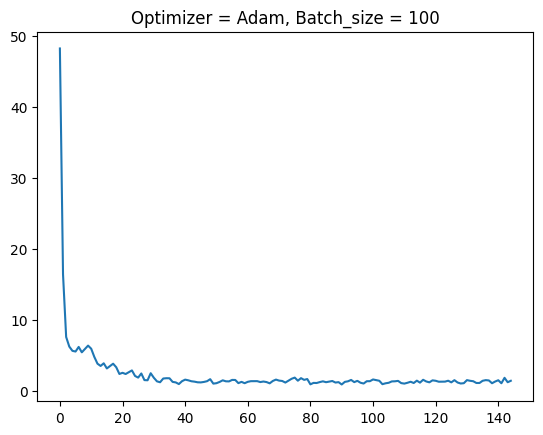

Loss of test is : 0.013334741815924644
----------------------Epoch 2----------------------
Batch 0 score is: 1.8159008026123047
Complated [0/14448]
Batch 50 score is: 1.0906593799591064
Complated [5000/14448]
Batch 100 score is: 1.6196280717849731
Complated [10000/14448]


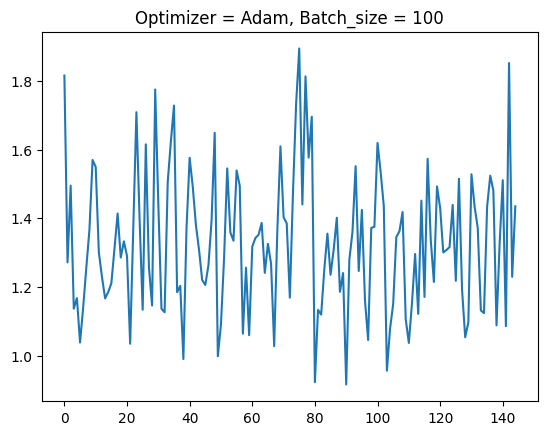

Loss of test is : 0.013335108757019043
----------------------Epoch 3----------------------
Batch 0 score is: 1.820542812347412
Complated [0/14448]
Batch 50 score is: 1.0907396078109741
Complated [5000/14448]
Batch 100 score is: 1.6211448907852173
Complated [10000/14448]


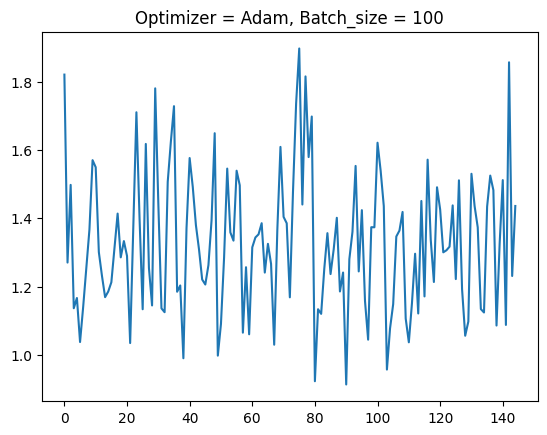

Loss of test is : 0.013338263146579266
----------------------Epoch 4----------------------
Batch 0 score is: 1.827072262763977
Complated [0/14448]
Batch 50 score is: 1.0907450914382935
Complated [5000/14448]
Batch 100 score is: 1.6223629713058472
Complated [10000/14448]


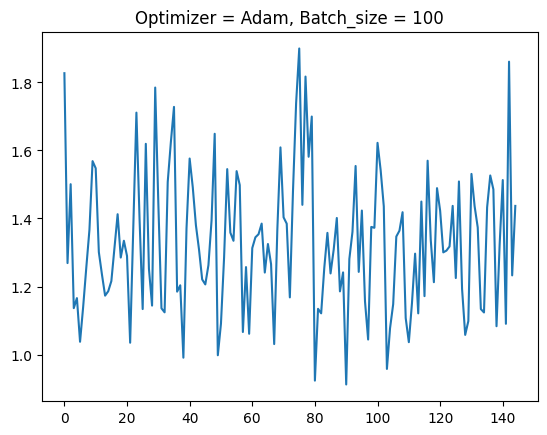

Loss of test is : 0.013342401012778282
----------------------Epoch 5----------------------
Batch 0 score is: 1.83194100856781
Complated [0/14448]
Batch 50 score is: 1.0907117128372192
Complated [5000/14448]
Batch 100 score is: 1.623500943183899
Complated [10000/14448]


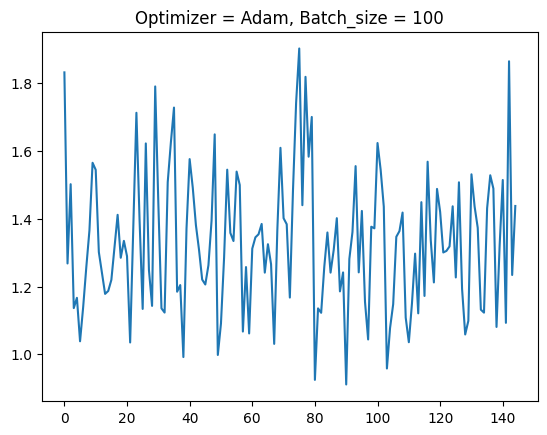

Loss of test is : 0.013345062732696533
----------------------Epoch 6----------------------
Batch 0 score is: 1.8344383239746094
Complated [0/14448]
Batch 50 score is: 1.0907844305038452
Complated [5000/14448]
Batch 100 score is: 1.6246106624603271
Complated [10000/14448]


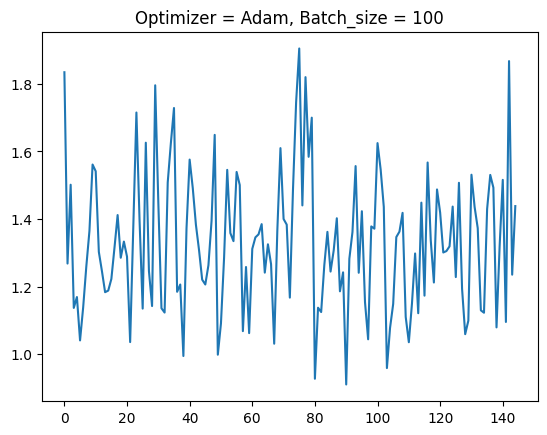

Loss of test is : 0.013345450162887573
----------------------Epoch 7----------------------
Batch 0 score is: 1.8347742557525635
Complated [0/14448]
Batch 50 score is: 1.0910710096359253
Complated [5000/14448]
Batch 100 score is: 1.6255847215652466
Complated [10000/14448]


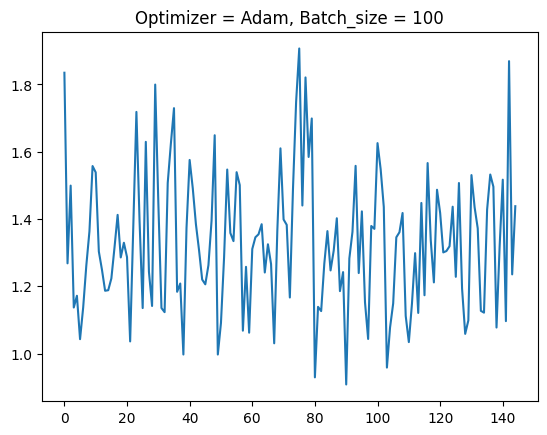

Loss of test is : 0.013344062492251396
----------------------Epoch 8----------------------
Batch 0 score is: 1.8335400819778442
Complated [0/14448]
Batch 50 score is: 1.0915974378585815
Complated [5000/14448]
Batch 100 score is: 1.6263397932052612
Complated [10000/14448]


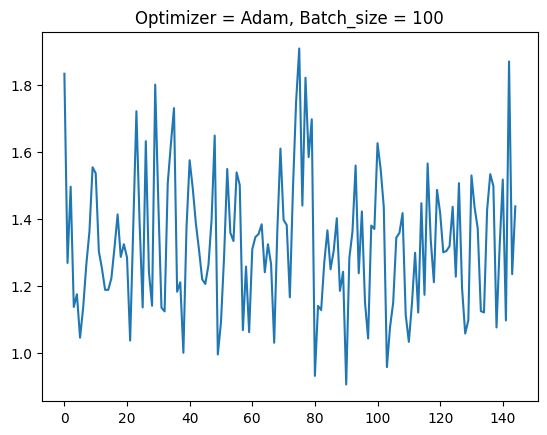

Loss of test is : 0.013341921381652355
----------------------Epoch 9----------------------
Batch 0 score is: 1.8314499855041504
Complated [0/14448]
Batch 50 score is: 1.09230375289917
Complated [5000/14448]
Batch 100 score is: 1.6268876791000366
Complated [10000/14448]


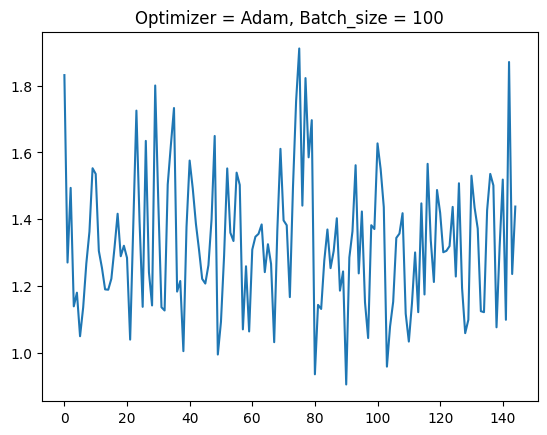

Loss of test is : 0.01333976536989212
----------------------Epoch 10----------------------
Batch 0 score is: 1.8290433883666992
Complated [0/14448]
Batch 50 score is: 1.0930620431900024
Complated [5000/14448]
Batch 100 score is: 1.6272644996643066
Complated [10000/14448]


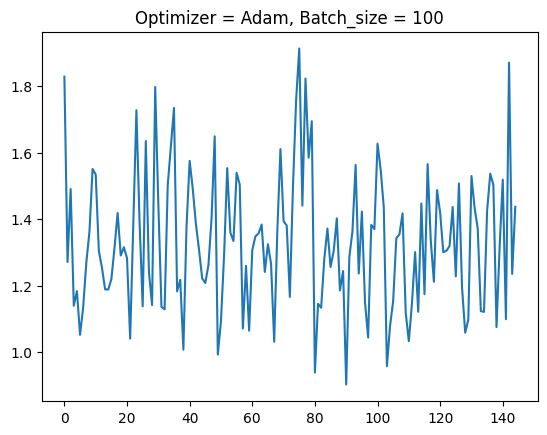

Loss of test is : 0.013337954878807068
----------------------Epoch 11----------------------
Batch 0 score is: 1.8266222476959229
Complated [0/14448]
Batch 50 score is: 1.093726396560669
Complated [5000/14448]
Batch 100 score is: 1.6274659633636475
Complated [10000/14448]


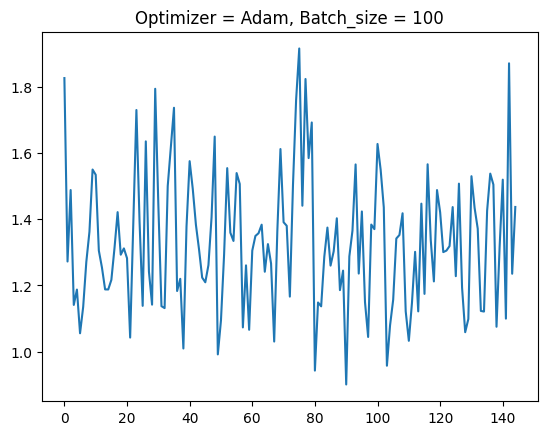

Loss of test is : 0.013336590491235256
----------------------Epoch 12----------------------
Batch 0 score is: 1.8243319988250732
Complated [0/14448]
Batch 50 score is: 1.0941894054412842
Complated [5000/14448]
Batch 100 score is: 1.627451777458191
Complated [10000/14448]


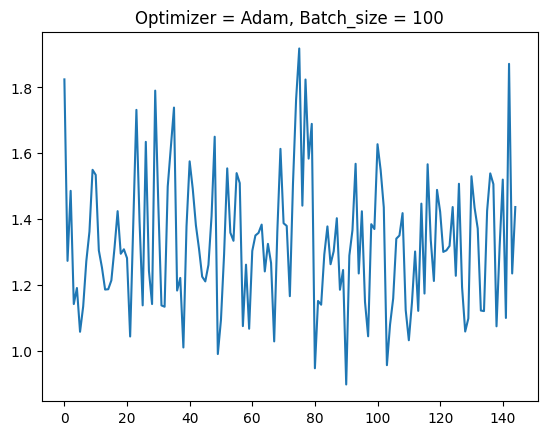

Loss of test is : 0.01333564706146717
----------------------Epoch 13----------------------
Batch 0 score is: 1.8222243785858154
Complated [0/14448]
Batch 50 score is: 1.0944068431854248
Complated [5000/14448]
Batch 100 score is: 1.6271902322769165
Complated [10000/14448]


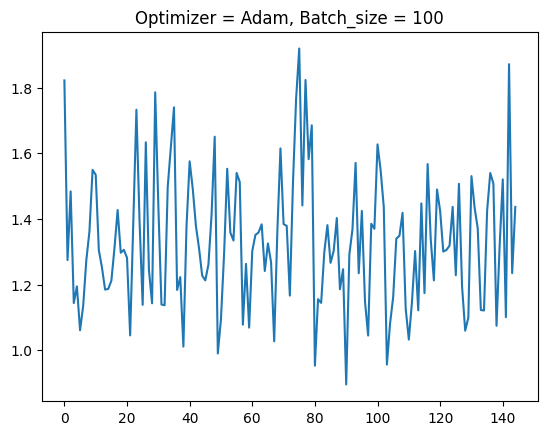

Loss of test is : 0.013335047289729118
----------------------Epoch 14----------------------
Batch 0 score is: 1.8202788829803467
Complated [0/14448]
Batch 50 score is: 1.0943927764892578
Complated [5000/14448]
Batch 100 score is: 1.6266896724700928
Complated [10000/14448]


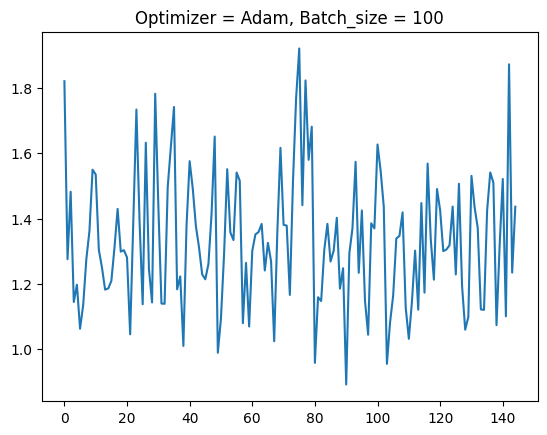

Loss of test is : 0.013334742747247219
----------------------Epoch 15----------------------
Batch 0 score is: 1.8184374570846558
Complated [0/14448]
Batch 50 score is: 1.0941963195800781
Complated [5000/14448]
Batch 100 score is: 1.626001000404358
Complated [10000/14448]


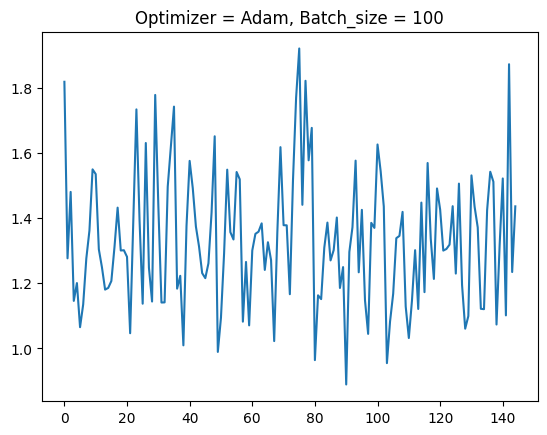

Loss of test is : 0.013334686867892742
----------------------Epoch 16----------------------
Batch 0 score is: 1.8166406154632568
Complated [0/14448]
Batch 50 score is: 1.0938777923583984
Complated [5000/14448]
Batch 100 score is: 1.6251990795135498
Complated [10000/14448]


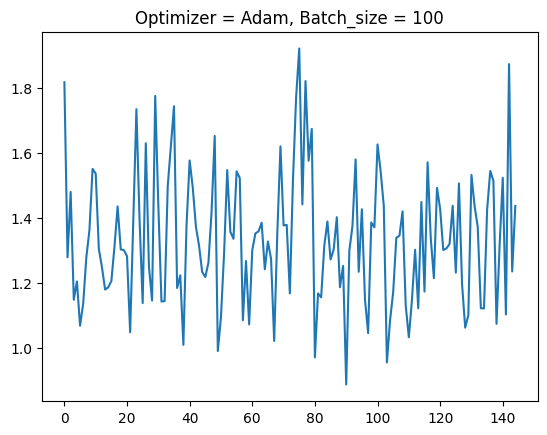

Loss of test is : 0.013334890827536583
----------------------Epoch 17----------------------
Batch 0 score is: 1.8148554563522339
Complated [0/14448]
Batch 50 score is: 1.0934935808181763
Complated [5000/14448]
Batch 100 score is: 1.6243585348129272
Complated [10000/14448]


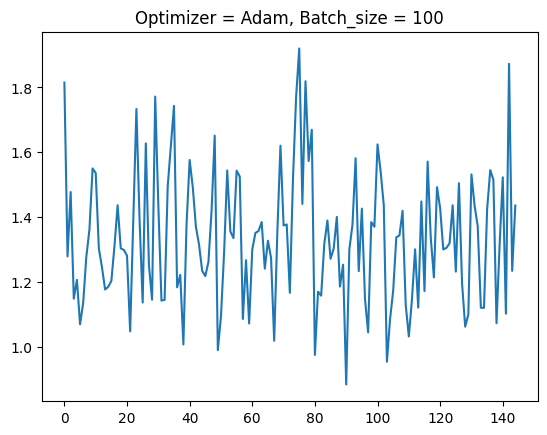

Loss of test is : 0.01333536021411419
----------------------Epoch 18----------------------
Batch 0 score is: 1.8130812644958496
Complated [0/14448]
Batch 50 score is: 1.093088150024414
Complated [5000/14448]
Batch 100 score is: 1.623538851737976
Complated [10000/14448]


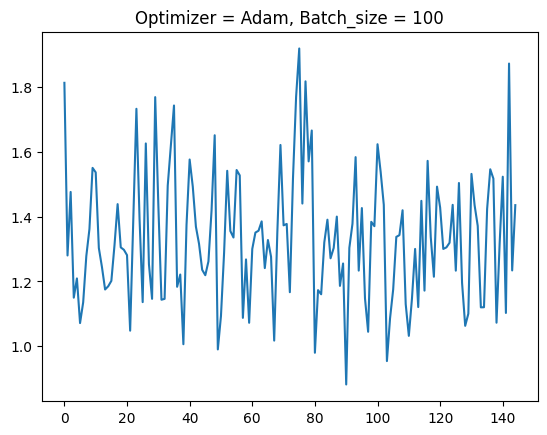

Loss of test is : 0.013336087577044964
----------------------Epoch 19----------------------
Batch 0 score is: 1.811340570449829
Complated [0/14448]
Batch 50 score is: 1.0926932096481323
Complated [5000/14448]
Batch 100 score is: 1.6227792501449585
Complated [10000/14448]


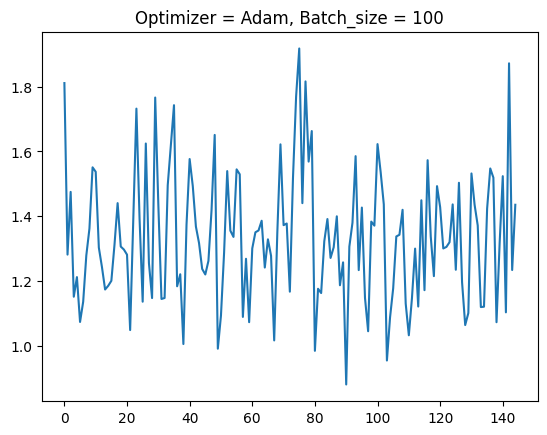

Loss of test is : 0.013337047770619392
----------------------Epoch 20----------------------
Batch 0 score is: 1.8096652030944824
Complated [0/14448]
Batch 50 score is: 1.0923283100128174
Complated [5000/14448]
Batch 100 score is: 1.6221002340316772
Complated [10000/14448]


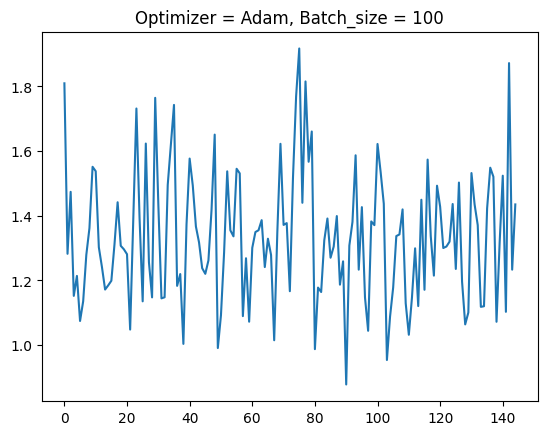

Loss of test is : 0.013338200747966766
DONE!


In [295]:
model = RegressionNeuralNetwork()
learning_rate = 0.1
batch_size = 100
epoch = 20
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
train_dataloader = DataLoader(train_data,batch_size = batch_size)
test_dataloader = DataLoader(test_data,batch_size = batch_size)


for i in range(epoch):
  print(f'----------------------Epoch {i+1}----------------------')
  train_loop(train_dataloader,model,loss_fn,optimizer)
  test_loop(train_dataloader,model,loss_fn,optimizer)
print("DONE!")
